Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading Dataset

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


I will be dropping a few features to make it easier to analyze the data and demonstrate the capabilities of the pivot_table function:

In [3]:
df.drop(['PassengerId','Ticket','Name'],inplace=True,axis=1)

Building pivot tables

In [4]:
# single indexing
table=pd.pivot_table(df,index='Pclass')
table

,Age,Fare,Parch,SibSp,Survived
Pclass,,,,,
1,38.233441,84.154687,0.356481,0.416667,0.629630
2,29.877630,20.662183,0.380435,0.402174,0.472826
3,25.140620,13.675550,0.393075,0.615071,0.242363


<AxesSubplot:xlabel='Pclass'>

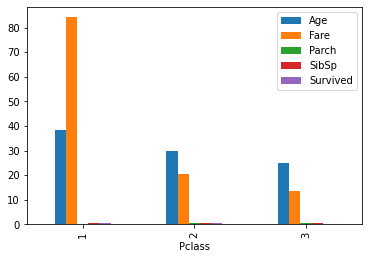

In [5]:
table.plot(kind='bar')

In [6]:
#multiple indexes
table = pd.pivot_table(df,index=['Pclass','Survived'])
table

Age       Fare     Parch     SibSp
Pclass Survived                                          
1      0         43.695312  64.684008  0.300000  0.287500
       1         35.368197  95.608029  0.389706  0.492647
2      0         33.544444  19.412328  0.144330  0.319588
       1         25.901566  22.055700  0.643678  0.494253
3      0         26.555556  13.669364  0.384409  0.672043
       1         20.646118  13.694887  0.420168  0.436975

In [7]:
table = pd.pivot_table(df,index=['Sex','Survived'])
table

Age       Fare     Parch    Pclass     SibSp
Sex    Survived                                                    
female 0         25.046875  23.024385  1.037037  2.851852  1.209877
       1         28.847716  51.938573  0.515021  1.918455  0.515021
male   0         31.618056  21.960993  0.207265  2.476496  0.440171
       1         27.276022  40.821484  0.357798  2.018349  0.385321

Using aggregation functions

In [8]:
table = pd.pivot_table(df,index=['Sex','Survived'],aggfunc={'Age':np.mean,'Pclass':np.sum})
table

Age  Pclass
Sex    Survived                   
female 0         25.046875     231
       1         28.847716     447
male   0         31.618056    1159
       1         27.276022     220

Aggregation on specific features using values parameter

In [9]:
table=pd.pivot_table(df,index=['Sex','Survived'],values=['Pclass'],aggfunc=np.mean)
table

Pclass
Sex    Survived          
female 0         2.851852
       1         1.918455
male   0         2.476496
       1         2.018349

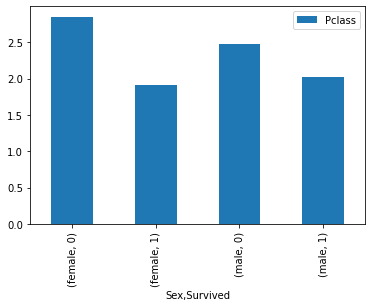

In [10]:
table.plot(kind='bar');

Relationship between features with columns parameter

In [11]:
table= pd.pivot_table(df,index=['Sex'],columns=['Pclass'],values=['Survived'],aggfunc=np.sum)
table

Survived        
Pclass        1   2   3
Sex                    
female       91  70  72
male         45  17  47

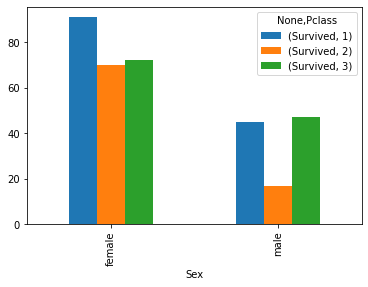

In [12]:
table.plot(kind='bar');

Handling missing data

In [13]:
#displaying null values
table=pd.pivot_table(df,index=['Pclass','Sex','Survived'],columns=['Embarked'],values=['Age'],aggfunc=np.mean)
table

Age                      
Embarked                        C          Q          S
Pclass Sex    Survived                                 
1      female 0         50.000000        NaN  13.500000
              1         35.675676  33.000000  33.619048
       male   0         43.050000  44.000000  45.362500
              1         36.437500        NaN  36.121667
2      female 0               NaN        NaN  36.000000
              1         19.142857  30.000000  29.091667
       male   0         29.500000  57.000000  33.414474
              1          1.000000        NaN  17.095000
3      female 0         20.700000  28.100000  23.688889
              1         11.045455  17.600000  22.548387
       male   0         27.555556  28.076923  27.168478
              1         18.488571  29.000000  22.933333

In [14]:
#handling null values
table = pd.pivot_table(df,index=['Pclass','Sex','Survived'],columns=['Embarked'],values=['Age'],aggfunc=np.mean,fill_value=np.mean(df['Age']))
table

Age                      
Embarked                        C          Q          S
Pclass Sex    Survived                                 
1      female 0         50.000000  29.699118  13.500000
              1         35.675676  33.000000  33.619048
       male   0         43.050000  44.000000  45.362500
              1         36.437500  29.699118  36.121667
2      female 0         29.699118  29.699118  36.000000
              1         19.142857  30.000000  29.091667
       male   0         29.500000  57.000000  33.414474
              1          1.000000  29.699118  17.095000
3      female 0         20.700000  28.100000  23.688889
              1         11.045455  17.600000  22.548387
       male   0         27.555556  28.076923  27.168478
              1         18.488571  29.000000  22.933333